In [138]:
import pandas as pd
import numpy as np

In [139]:
train_df = pd.read_csv('train.csv')

In [140]:
test_df = pd.read_csv('test.csv')

In [141]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [142]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [143]:
# Age → 평균값으로 채우기
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [144]:
# Fare → 평균값으로 채우기
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [145]:
# FamilySize 생성
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

In [146]:
# Cabin → 객실번호 지우고 알파벳만 남기기
train_df['Cabin'] = train_df['Cabin'].str[0]
test_df['Cabin'] = test_df['Cabin'].str[0]

In [147]:
# Cabin → 가장 많은 알파벳 수 확인하기
print(train_df['Cabin'].value_counts())
print('-'*25)
print(test_df['Cabin'].value_counts())

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64
-------------------------
C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64


In [148]:
# Cabin → 가장 많은 알파벳으로 대체하기
train_df['Cabin'] = train_df['Cabin'].fillna('C')
test_df['Cabin'] = test_df['Cabin'].fillna('C')

In [149]:
# Embarked → 가장 많은 알파벳 수 확인하기
print(train_df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [150]:
# Embarked → 가장 많은 알파벳으로 대체하기
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [151]:
# 문자를 숫자로 변환
# train_df.loc[train_df['Cabin'] == 'C', 'Cabin'] = 0
# train_df.loc[train_df['Cabin'] == 'B', 'Cabin'] = 1

In [152]:
# Cabin → 알파벳을 숫자로 변환하기
train_df['Cabin'] = train_df['Cabin'].map({
    'C': 0, 'B': 1, 'D': 2, 'E': 3,
    'A': 4, 'F': 5, 'G': 6, 'T': 7
})

test_df['Cabin'] = test_df['Cabin'].map({
    'C': 0, 'B': 1, 'D': 2, 'E': 3,
    'A': 4, 'F': 5, 'G': 6, 'T': 7
})

In [153]:
# Embarked → 알파벳을 숫자로 변환하기
train_df['Embarked'] = train_df['Embarked'].map({
    'S': 0, 'C': 1, 'Q': 2
})

test_df['Embarked'] = test_df['Embarked'].map({
    'S': 0, 'C': 1, 'Q': 2
})

In [154]:
# Sex → 남/여를 숫자로 변환하기
train_df['Sex'] = train_df['Sex'].map({
    'male': 0, 'female': 1
})

test_df['Sex'] = test_df['Sex'].map({
    'male': 0, 'female': 1
})

In [155]:
# 불필요한 열 삭제하기
train = train_df.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'], axis=1)
test = test_df.drop(['Name', 'Ticket', 'SibSp', 'Parch', 'PassengerId'], axis=1)

In [156]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,0,1
1,1,1,1,38.0,71.2833,0,1,1
2,1,3,1,26.0,7.9250,0,0,0
3,1,1,1,35.0,53.1000,0,0,1
4,0,3,0,35.0,8.0500,0,0,0


In [157]:
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,0,34.5,7.8292,0,2,0
1,3,1,47.0,7.0000,0,0,1
2,2,0,62.0,9.6875,0,2,0
3,3,0,27.0,8.6625,0,0,0
4,3,1,22.0,12.2875,0,0,2


In [158]:
# 모델의 학습에 사용되는 데이터 : Training set
# 모델 제작 과정 중, 학습된 모델의 성능을 측정하기 위한 데이터 : Validation set
# 모델의 최종 성능을 평가하기 위한 데이터 : Test set

In [159]:
from sklearn.model_selection import train_test_split

# 훈련용 데이터에서 data, label(target) 분리
train_data = train.drop('Survived', axis=1)  # 학습용 데이터
target_data = train['Survived']  # 학습용 데이터의 label(target)

x_train, x_valid, y_train, y_valid = train_test_split(train_data, target_data)
print(train_data.shape, x_train.shape, x_valid.shape)

(891, 7) (668, 7) (223, 7)


In [160]:
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
tree_dec = DecisionTreeClassifier()

# 학습하기
tree_dec.fit(x_train, y_train)

DecisionTreeClassifier()

In [175]:
print('Training set accuracy :', tree_dec.score(x_train, y_train))
print('Validation set accuracy :', tree_dec.score(x_valid, y_valid))

Training Set accuracy : 0.9835329341317365
Validation Set accuracy : 0.8340807174887892


In [176]:
# 만들어진 Decision Tree로 test data 판단
prediction = tree_dec.predict(test)
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [163]:
submit = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': prediction
})
submit.to_csv('survived.csv', index=False)

In [164]:
my_prediction = pd.read_csv('survived.csv')
my_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


[Text(742.275, 849.0514285714286, 'Sex <= 0.5\ngini = 0.477\nsamples = 668\nvalue = [406, 262]\nclass = Unsurvived'),
 Text(548.25, 807.6342857142857, 'Fare <= 26.269\ngini = 0.33\nsamples = 436\nvalue = [345, 91]\nclass = Unsurvived'),
 Text(414.9, 766.2171428571428, 'Age <= 10.0\ngini = 0.246\nsamples = 314\nvalue = [269, 45]\nclass = Unsurvived'),
 Text(405.3, 724.8, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Survived'),
 Text(424.5, 724.8, 'Age <= 32.5\ngini = 0.217\nsamples = 307\nvalue = [269, 38]\nclass = Unsurvived'),
 Text(323.4, 683.3828571428571, 'Age <= 28.75\ngini = 0.246\nsamples = 230\nvalue = [197, 33]\nclass = Unsurvived'),
 Text(210.0, 641.9657142857143, 'Embarked <= 0.5\ngini = 0.21\nsamples = 201\nvalue = [177, 24]\nclass = Unsurvived'),
 Text(81.6, 600.5485714285714, 'Fare <= 13.25\ngini = 0.169\nsamples = 150\nvalue = [136, 14]\nclass = Unsurvived'),
 Text(72.0, 559.1314285714286, 'Fare <= 7.013\ngini = 0.196\nsamples = 127\nvalue = [113, 14]\nclass = Unsur

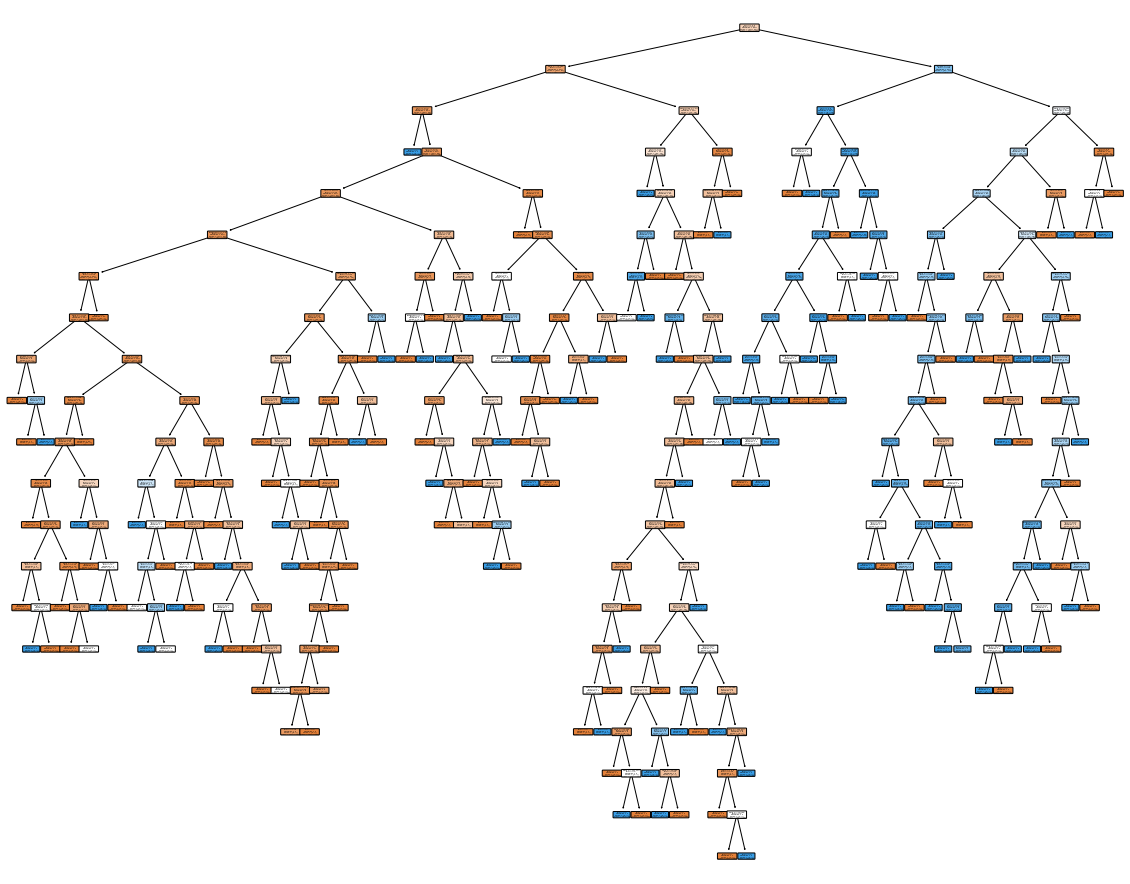

In [165]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
feature_name = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'FamilySize']
tree.plot_tree(tree_dec, class_names=['Unsurvived', 'Survived'],
               feature_names=feature_name, impurity=True, filled=True, rounded=True)

In [166]:
print('숫자가 클수록 중요도가 크다.')
for name, value in zip(feature_name, tree_dec.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

숫자가 클수록 중요도가 크다.
Pclass: 0.094
Sex: 0.277
Age: 0.282
Fare: 0.250
Cabin: 0.018
Embarked: 0.015
FamilySize: 0.064


<AxesSubplot:>

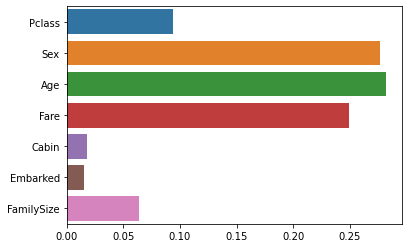

In [167]:
import seaborn as sns
sns.barplot(x=tree_dec.feature_importances_, y=feature_name)

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# parameters = {
#     'max_depth': [8, 10, 12, 15],
#     'min_samples_split': [4, 5, 7],
#     'min_samples_leaf': [1, 2, 3]
# }

parameters = {
    'max_depth': [2, 3, 5, 8],
    'min_samples_split': [7, 8, 9],
    'min_samples_leaf': [1, 2, 3]
}

grid_dclf = GridSearchCV(
    tree_dec, param_grid=parameters, scoring='accuracy', cv=5)

grid_dclf.fit(x_train, y_train)
print(grid_dclf)
print(f'GridSearchCV 최적의 하이퍼 파라미터: {grid_dclf.best_params_}')
print(f'GridSearchCV 최고 정확도: {grid_dclf.best_score_ :.4f}')

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [7, 8, 9]},
             scoring='accuracy')
GridSearchCV 최적의 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 7}
GridSearchCV 최고 정확도: 0.8023


In [169]:
best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(x_valid)
accuracy = accuracy_score(y_valid, dpredictions)

print(f'테스트 세트에서 DecisionTreeClassifier 정확도: {round(accuracy, 4)}')

테스트 세트에서 DecisionTreeClassifier 정확도: 0.861


In [170]:
# 훈련용
tree_dec.fit(x_train, y_train)
dt_pred = tree_dec.predict(x_valid)  # 검증용
print('tree_dec DecisionTreeClassifier 정확도: {0:.4f}'.format(
    accuracy_score(y_valid, dt_pred)))

tree_dec DecisionTreeClassifier 정확도: 0.8341


In [171]:
length = y_valid.shape[0]
accuracy = accuracy_score(y_valid, dpredictions)
print({f'총 {length}명 중 {accuracy * 100:.3f}% 정확도로 생존을 맞춤'})

{'총 223명 중 86.099% 정확도로 생존을 맞춤'}


In [172]:
best_accuracy = accuracy_score(y_valid, dt_pred)
print({f'총 {length}명 중 {best_accuracy * 100:.3f}% 정확도로 생존을 맞춤'})

{'총 223명 중 83.408% 정확도로 생존을 맞춤'}


[Text(558.0, 761.04, 'Sex <= 0.5\ngini = 0.477\nsamples = 668\nvalue = [406, 262]\nclass = Unsurvived'),
 Text(279.0, 543.6, 'Fare <= 26.269\ngini = 0.33\nsamples = 436\nvalue = [345, 91]\nclass = Unsurvived'),
 Text(139.5, 326.15999999999997, 'Age <= 10.0\ngini = 0.246\nsamples = 314\nvalue = [269, 45]\nclass = Unsurvived'),
 Text(69.75, 108.72000000000003, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = Survived'),
 Text(209.25, 108.72000000000003, 'gini = 0.217\nsamples = 307\nvalue = [269, 38]\nclass = Unsurvived'),
 Text(418.5, 326.15999999999997, 'FamilySize <= 3.5\ngini = 0.47\nsamples = 122\nvalue = [76, 46]\nclass = Unsurvived'),
 Text(348.75, 108.72000000000003, 'gini = 0.491\nsamples = 104\nvalue = [59, 45]\nclass = Unsurvived'),
 Text(488.25, 108.72000000000003, 'gini = 0.105\nsamples = 18\nvalue = [17, 1]\nclass = Unsurvived'),
 Text(837.0, 543.6, 'Pclass <= 2.5\ngini = 0.388\nsamples = 232\nvalue = [61, 171]\nclass = Survived'),
 Text(697.5, 326.15999999999997, 'Age <= 

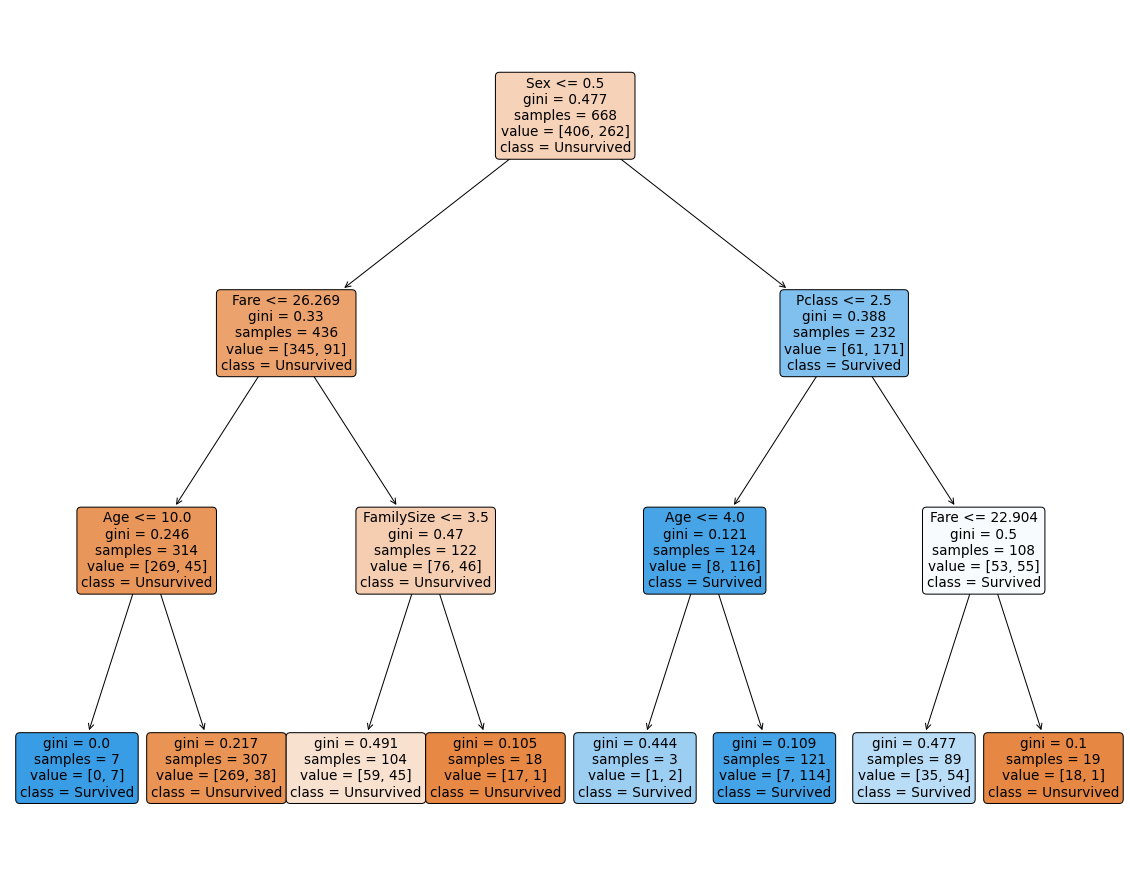

In [173]:
# 시각화 : 하이퍼 파라미터 적용한 모델
plt.figure(figsize=(20, 16))
feature_name = ['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'FamilySize']
tree.plot_tree(best_dclf, class_names=['Unsurvived', 'Survived'],
               feature_names=feature_name, impurity=True, filled=True, rounded=True)